In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer

import pickle

In [2]:
house_price = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
house_price.shape

(1460, 81)

In [5]:
df_num = house_price.select_dtypes(include=['int64', 'float64'])
df_num = df_num.dropna()

print("Dimensions après nettoyage :", df_num.shape)

Dimensions après nettoyage : (1121, 38)


In [7]:
X = df_num.drop("SalePrice", axis=1)
y = df_num["SalePrice"]

In [8]:
y_binned = pd.cut(y, bins=10, labels=False)

Text(0, 0.5, 'Nombre de maisons')

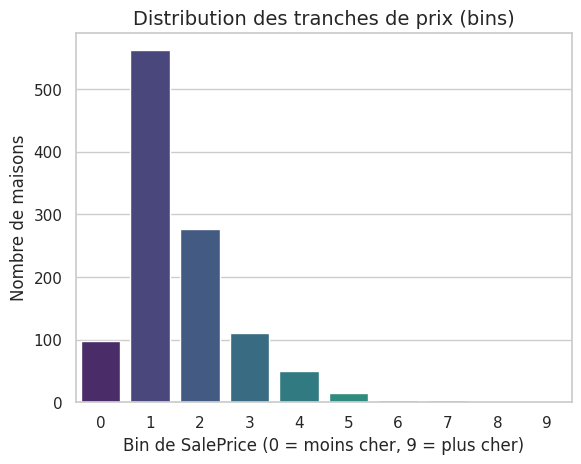

In [10]:
import seaborn as sns

# Style et taille du graphique
sns.set_theme(style="whitegrid")

# Visualisation de la distribution des bins
ax = sns.countplot(
    data=pd.DataFrame({"SalePrice_bin": y_binned}),
    x="SalePrice_bin",
    palette="viridis"
)

# Personnalisation
ax.set_title("Distribution des tranches de prix (bins)", fontsize=14)
ax.set_xlabel("Bin de SalePrice (0 = moins cher, 9 = plus cher)", fontsize=12)
ax.set_ylabel("Nombre de maisons", fontsize=12)

In [11]:
# Étape 5 : Division en ensemble d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y_binned
)

print("Taille du train :", X_train.shape)
print("Taille du test :", X_test.shape)

Taille du train : (672, 37)
Taille du test : (449, 37)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


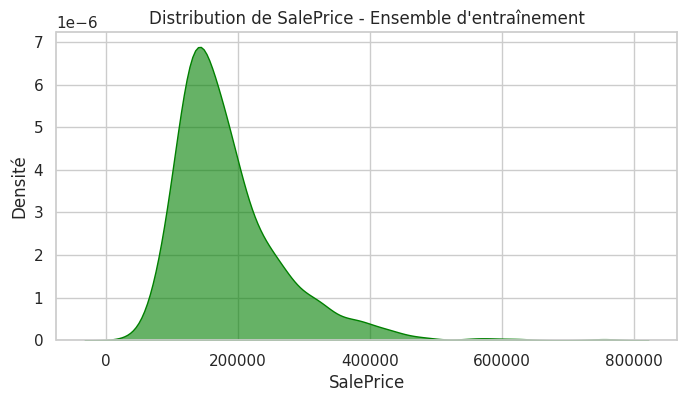

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


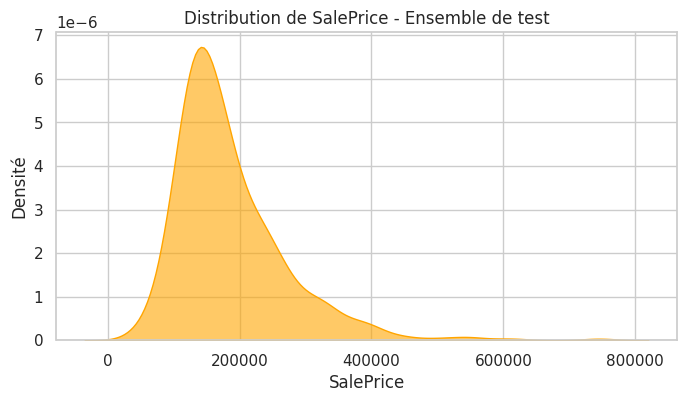

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Style général
sns.set_theme(style="whitegrid")

# --- Distribution TRAIN ---
plt.figure(figsize=(8, 4))
sns.kdeplot(
    y_train,
    fill=True,
    color="green",
    alpha=0.6
)
plt.title("Distribution de SalePrice - Ensemble d'entraînement")
plt.xlabel("SalePrice")
plt.ylabel("Densité")
plt.show()

# --- Distribution TEST ---
plt.figure(figsize=(8, 4))
sns.kdeplot(
    y_test,
    fill=True,
    color="orange",
    alpha=0.6
)
plt.title("Distribution de SalePrice - Ensemble de test")
plt.xlabel("SalePrice")
plt.ylabel("Densité")
plt.show()

In [19]:
# Étape 6 : Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Étape 7 : Évaluation du modèle

# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcul des métriques
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Évaluation du modèle LinearRegression :")
print(f"RMSE Train : {rmse_train:.2f}")
print(f"RMSE Test  : {rmse_test:.2f}")
print(f"R² Train   : {r2_train:.4f}")
print(f"R² Test    : {r2_test:.4f}")

Évaluation du modèle LinearRegression :
RMSE Train : 36877.26
RMSE Test  : 37944.25
R² Train   : 0.7978
R² Test    : 0.7977
